In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Exploration
### 1) For numeric data 
* Made histograms to understand distributions 
* Corrplot 
* Pivot table comparing survival rate across numeric variables 


### 2) For Categorical Data 
* Made bar charts to understand balance of classes 
* Made pivot tables to understand relationship with survival 

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [6]:
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

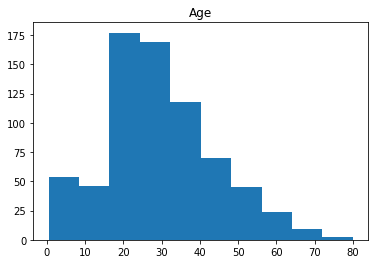

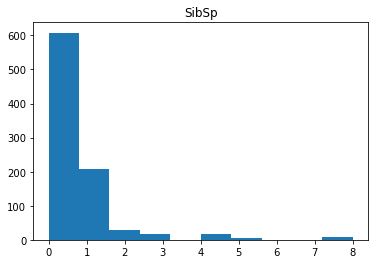

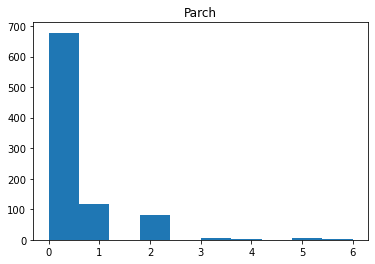

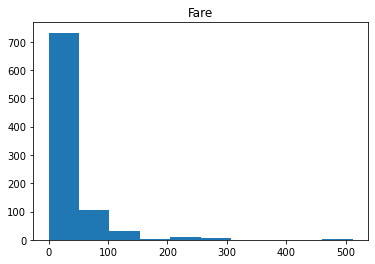

In [7]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

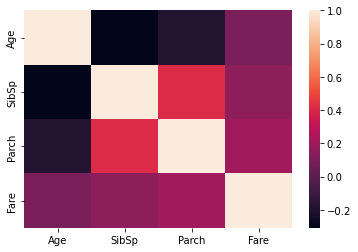

In [8]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [9]:
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


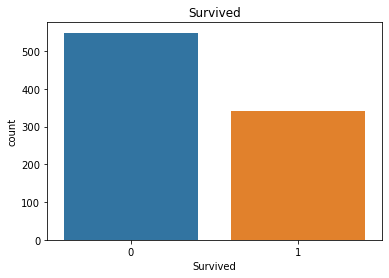

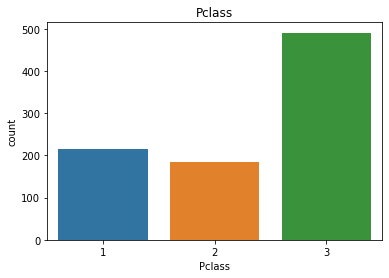

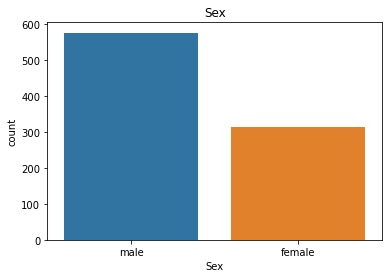

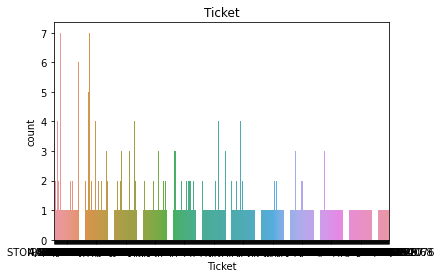

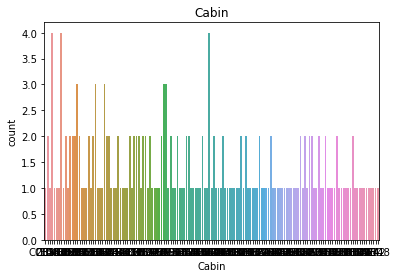

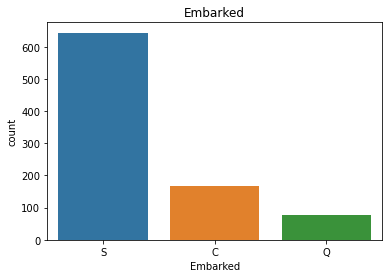

In [10]:
for column in df_cat.columns:
    sns.countplot(data=df_cat, x=column)
    plt.title(column)
    plt.show()

In [11]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


## Feature Engineering 
### 1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)

### 2) Tickets - Do different ticket types impact survival rates?

### 3) Does a person's title relate to survival rates? 

In [12]:
df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [13]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [14]:
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

In [15]:
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [16]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n


In [17]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [18]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv,numeric_ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,1


In [19]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [20]:
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [21]:
#feature engineering on person's title 
training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#mr., ms., master. etc

In [22]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [23]:
test['cabin_multiple'] = test.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
test['cabin_adv'] = test.Cabin.apply(lambda x: str(x)[0])
test['numeric_ticket'] = test.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
test['name_title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

## Data Preprocessing for Model 
### 1) Drop null values from Embarked (only 2) 

### 2) Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with) 
Variables:  'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'

### 3) Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data through this method. I will stress, this is generally not recommend outside of a competition (use onehot encoder). 

### 4) Impute data with mean for fare and age (Should also experiment with median) 

### 5) Normalized fare using logarithm to give more semblance of a normal distribution 

### 6) Scaled data 0-1 with standard scaler 

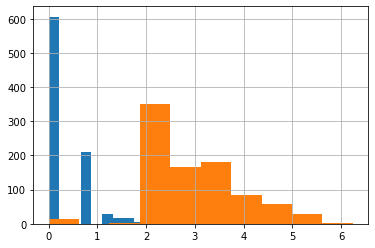

In [24]:
#impute nulls for continuous data 

training.Age=training.Age.fillna(training.Age.mean())
test.Age=test.Age.fillna(test.Age.mean())

training.Fare=training.Fare.fillna(training.Fare.median())
test.Fare=test.Fare.fillna(test.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
training.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
training['norm_sibsp'] = np.log(training.SibSp+1)
training['norm_sibsp'].hist()

# log norm of fare (used)
training['norm_fare'] = np.log(training.Fare+1)
training['norm_fare'].hist()
test['norm_fare'] = np.log(test.Fare+1)

training.Pclass = training.Pclass.astype(str)
test.Pclass = test.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
train_dummies = pd.get_dummies(training[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title']])
test_dummies = pd.get_dummies(test[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title']])

In [25]:
train_dummies

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22.000000,1,0,2.110213,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,38.000000,1,0,4.280593,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,26.000000,0,0,2.188856,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,35.000000,1,0,3.990834,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,35.000000,0,0,2.202765,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,2.639057,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
887,19.000000,0,0,3.433987,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
888,29.699118,1,2,3.196630,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
889,26.000000,0,0,3.433987,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
training_scaled = train_dummies.copy()
test_scaled = test_dummies.copy()
training_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(training_scaled[['Age','SibSp','Parch','norm_fare']])

test_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(test_scaled[['Age','SibSp','Parch','norm_fare']])

X_train = training_scaled
X_test = test_scaled

y_train = training['Survived']

In [27]:
training_scaled

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.590495,0.431350,-0.474326,-0.877591,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.643971,0.431350,-0.474326,1.366380,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-0.281878,-0.475199,-0.474326,-0.796281,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0.412509,0.431350,-0.474326,1.066796,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.412509,-0.475199,-0.474326,-0.781901,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.204724,-0.475199,-0.474326,-0.330815,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
887,-0.821957,-0.475199,-0.474326,0.491068,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
888,0.003524,0.431350,2.006119,0.245663,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
889,-0.281878,-0.475199,-0.474326,0.491068,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [29]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [30]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626


In [31]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76404494 0.73595506 0.85393258 0.76966292 0.84180791]
0.7930806830444995


In [32]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80898876 0.78089888 0.83707865 0.79775281 0.85875706]
0.8166952326540976


In [33]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83146067 0.78651685 0.85393258 0.73595506 0.84180791]
0.8099346156287691


In [34]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.86440678]
0.8324319177299563


In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.84831461 0.78651685 0.81920904]
0.8177743921792675


In [36]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [37]:
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83707865 0.81460674 0.83146067 0.80337079 0.85875706]
0.8290547832158953


In [45]:
training_columns = set(training_scaled.columns)
test_columns = set(test_scaled.columns)

columns_not_in_test = training_columns - test_columns

print(columns_not_in_test)

{'name_title_Mme', 'name_title_Lady', 'name_title_Mlle', 'name_title_Capt', 'name_title_Sir', 'name_title_Jonkheer', 'cabin_adv_T', 'name_title_Don', 'name_title_the Countess', 'name_title_Major'}


In [65]:
X_test_new = pd.DataFrame(columns=training_scaled.columns)

for i in training_columns:
    if i in columns_not_in_test:
        X_test_new[i] = 0
    X_test_new[i] = X_test[i]

In [66]:
X_test_new

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,0.334993,-0.499470,-0.400248,-0.867031,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1.325530,0.616992,-0.400248,-0.969149,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,2.514175,-0.499470,-0.400248,-0.669252,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.259330,-0.499470,-0.400248,-0.773647,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.655545,0.616992,0.619896,-0.443786,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.000000,-0.499470,-0.400248,-0.841455,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
414,0.691586,-0.499470,-0.400248,1.743832,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
415,0.651965,-0.499470,-0.400248,-0.937287,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
416,0.000000,-0.499470,-0.400248,-0.841455,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [67]:
X_train

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,-0.590495,0.431350,-0.474326,-0.877591,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.643971,0.431350,-0.474326,1.366380,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-0.281878,-0.475199,-0.474326,-0.796281,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,0.412509,0.431350,-0.474326,1.066796,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.412509,-0.475199,-0.474326,-0.781901,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.204724,-0.475199,-0.474326,-0.330815,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
887,-0.821957,-0.475199,-0.474326,0.491068,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
888,0.003524,0.431350,2.006119,0.245663,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
889,-0.281878,-0.475199,-0.474326,0.491068,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [68]:
voting_clf.fit(X_train,y_train)
y_hat_base_vc = voting_clf.predict(X_test_new).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
submission = pd.DataFrame(data=basic_submission)
submission.to_csv('submission.csv', index=False)